## Portfolio assignment 19
30 min: Create a cluster model on the penguins dataset.
- Use the pairplot() function on the penguins dataset. Do you visually notice any clusters? How many clusters do you think there are?
- Use the KMeans algorithm to create a cluster model. Apply this model to the dataset to create an extra column 'cluster' just like we did for the iris dataset above.  
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Calculate the Silhouette Coefficient for your clustering. Play around with the features and n_clusters to search for better results. Keep the cluster model with the highest Silhouette Coefficient.
- Use the pairplot(hue='cluster') function to observe how the model has clustered the data.
- We know the species of each penguin. Use a contingency table to reveal the relation between the cluster results and the species. Is there an exact match? Are there species which ended up in the same cluster? If so, what does it mean that they ended up in the same cluster?

In [32]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

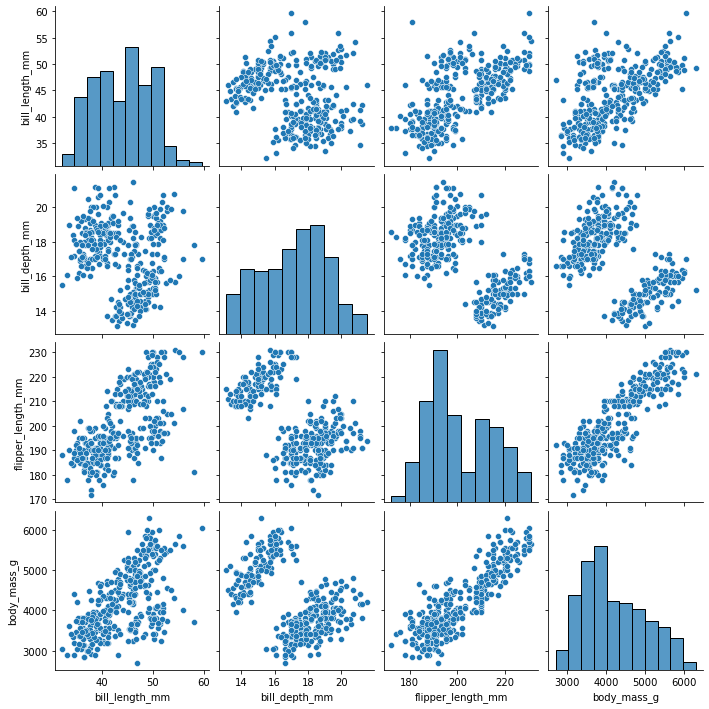

In [33]:
penguins = sns.load_dataset("penguins")
penguins.dropna(axis=0, inplace= True)
sns.pairplot(penguins)

In [34]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=2, random_state=42).fit(penguins[features])

In [35]:
penguins['cluster'] = km.predict(penguins[features])

In [36]:
penguins.cluster.value_counts()

1    203
0    130
Name: cluster, dtype: int64

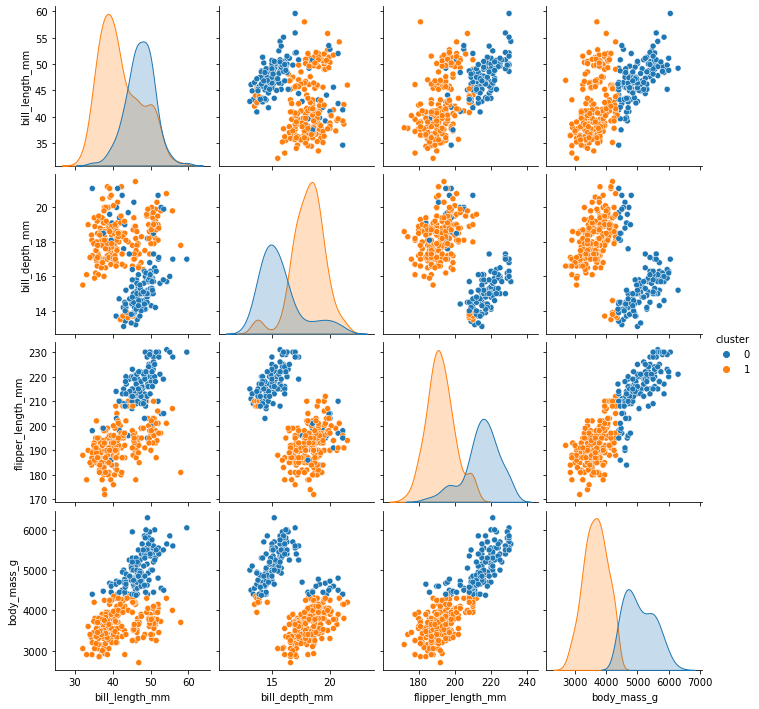

In [37]:
sns.pairplot(penguins, hue="cluster")

In [38]:
# You can change the features and n_clusters in the k-means above and check the impact on the Silhouette Coefficient
metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')

0.6307117469850305

In [39]:
contingency_table = penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster      0    1
species            
Adelie      14  132
Chinstrap    5   63
Gentoo     111    8

There are mixed types of penguins in the clusters, but overall it does a pretty good job of dividing them in clusters. That some penguins are in the same cluster means that they are too simular in their attributes, and the algorithm can't place them in another cluster, so it's placed in another cluster with more pinguins similar to it